In [30]:
import functools

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [31]:
def f(x):
    return np.abs(x - 3) * (x ** 2 + 1)


x_min, x_max = 0, 4

In [32]:
x = np.arange(x_min, x_max, 0.05)
y = f(x)

In [33]:
k = 3
x_more = []
for i in range(len(x) - 1):
    d = x[i + 1] - x[i]
    delta = d / k
    for j in range(k):
        x_more.append(x[i] + delta * j)
x_more.append(x[-1])
x_more = np.array(x_more)
x_more

array([0.        , 0.01666667, 0.03333333, 0.05      , 0.06666667,
       0.08333333, 0.1       , 0.11666667, 0.13333333, 0.15      ,
       0.16666667, 0.18333333, 0.2       , 0.21666667, 0.23333333,
       0.25      , 0.26666667, 0.28333333, 0.3       , 0.31666667,
       0.33333333, 0.35      , 0.36666667, 0.38333333, 0.4       ,
       0.41666667, 0.43333333, 0.45      , 0.46666667, 0.48333333,
       0.5       , 0.51666667, 0.53333333, 0.55      , 0.56666667,
       0.58333333, 0.6       , 0.61666667, 0.63333333, 0.65      ,
       0.66666667, 0.68333333, 0.7       , 0.71666667, 0.73333333,
       0.75      , 0.76666667, 0.78333333, 0.8       , 0.81666667,
       0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
       0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
       1.        , 1.01666667, 1.03333333, 1.05      , 1.06666667,
       1.08333333, 1.1       , 1.11666667, 1.13333333, 1.15      ,
       1.16666667, 1.18333333, 1.2       , 1.21666667, 1.23333

In [46]:
def get_linear_interp(x1, x2, y1, y2, xp):
    if x1 <= xp <= x2:
        yp = y1 + ((y2 - y1) / (x2 - x1)) * (xp - x1)
        return yp
    else:
        assert False  # @todo переделать


def get_linear_interp_all(x, y):
    xs = []
    ys = []
    for i in range(len(x) - 1):
        d = x[i + 1] - x[i]
        delta = d / k
        for j in range(k):
            xp = x[i] + j * delta
            yp = get_linear_interp(x[i], x[i + 1], y[i], y[i + 1], xp)

            xs.append(xp)
            ys.append(yp)

        # xs.append(x[i + 1])
        # ys.append(y[i + 1])
    xs.append(x[-1])
    ys.append(y[-1])
    return xs, ys

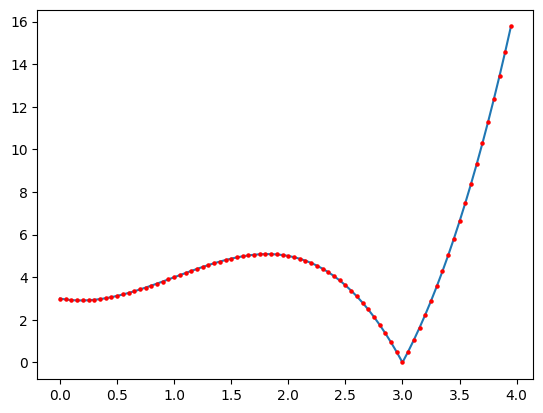

In [47]:
plt.plot(x, y)
plt.scatter(x, y, s=5, c='r', zorder=2)

In [53]:
xs, ys = get_linear_interp_all(x, y)

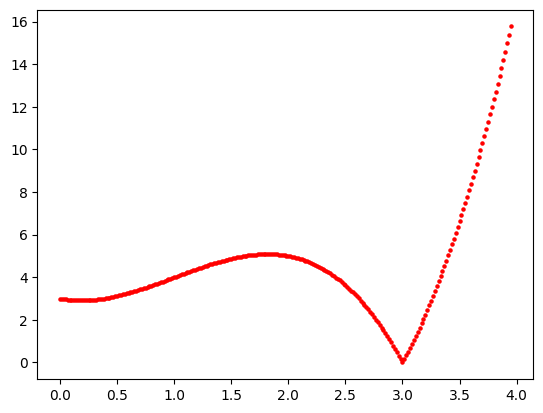

In [54]:
plt.scatter(xs, ys, s=5, c='r', zorder=2)

In [67]:
from functools import cache

def inter(f, x_list, x):
    def calc_w(x_list, x: float) -> float:
        w = 1
        for j in range(len(x_list)):
            w *= x - x_list[j]
        return w
    
    def calc_separated_differences(f, x_list) -> float:
        """
        Функция, вычисляющая разделенные разности (стр. 319)
        """
        if len(x_list) == 1:
            return f(x_list[0])
        if len(x_list) == 2:
            return (f(x_list[1]) - f(x_list[0])) / (x_list[1] - x_list[0])
        if len(x_list) >= 2:
            f1 = calc_separated_differences(f, x_list[1:])
            f2 = calc_separated_differences(f, x_list[:-1])
            return (f1 - f2) / (x_list[-1] - x_list[0])

    p = 0
    for k in range(len(x_list)):
        w = calc_w(x_list[:k], x)
        sep = calc_separated_differences(f, x_list[:k + 1])
        p += sep * w
    return p

In [ ]:
inter_list = []
for xp in x_more[:10]:
    inter_list.append(inter(f, x, xp))
inter_list